## Kmean clustering and cluster visualization in 3D

In [1]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import nbformat

In [2]:
# load the cutomer data

df = pd.read_csv('C:/Users/nkeng/Desktop/Trainings/1_Tech Talent Academy/TTA_Assignments/Week (15)/Segments.csv')
df.head()

,CustomerId,Gender,Age,Income,CumulativePurchases
0,1000,Female,36,256414.11,7846
1,1001,Male,48,46732.47,1696
2,1002,Male,47,20000.00,90
3,1003,Male,16,61917.71,2753
4,1004,Male,25,20000.00,2079


In [3]:
#Obtain information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerId           5002 non-null   int64  
 1   Gender               5002 non-null   object 
 2   Age                  5002 non-null   int64  
 3   Income               5002 non-null   float64
 4   CumulativePurchases  5002 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 195.5+ KB


In [4]:
#View the statistical summary of numerical variables

df.describe()

,CustomerId,Age,Income,CumulativePurchases
count,5002.000000,5002.000000,5002.000000,5002.000000
mean,3500.500000,28.241703,82758.917925,2745.173331
std,1444.097354,14.547585,56489.975941,2451.268026
min,1000.000000,3.000000,20000.000000,0.000000
25%,2250.250000,15.000000,38212.875000,741.250000
50%,3500.500000,28.000000,74000.290000,2093.000000
75%,4750.750000,41.000000,111236.582500,4328.750000
max,6001.000000,53.000000,419076.120000,15071.000000


In [5]:
# creating a two dimentional matrix 
x = df.iloc[:,[3,4]].values

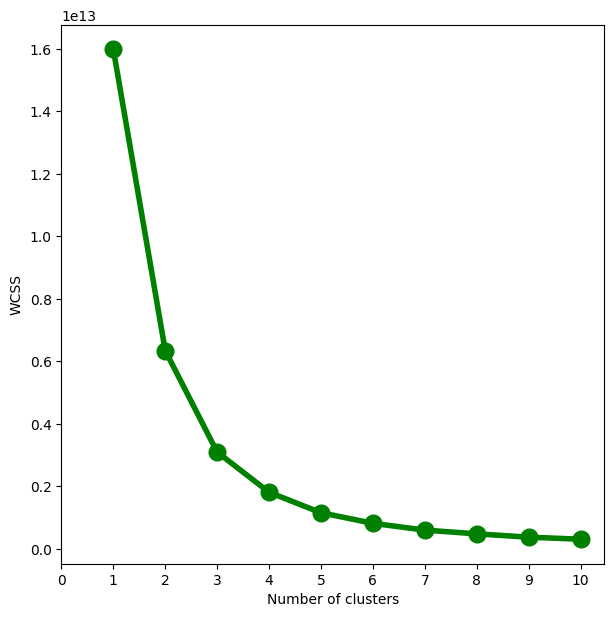

In [6]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
# since elbow occured at 4, hence the optimal number of clusters for the eCommerce data is 4 

model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

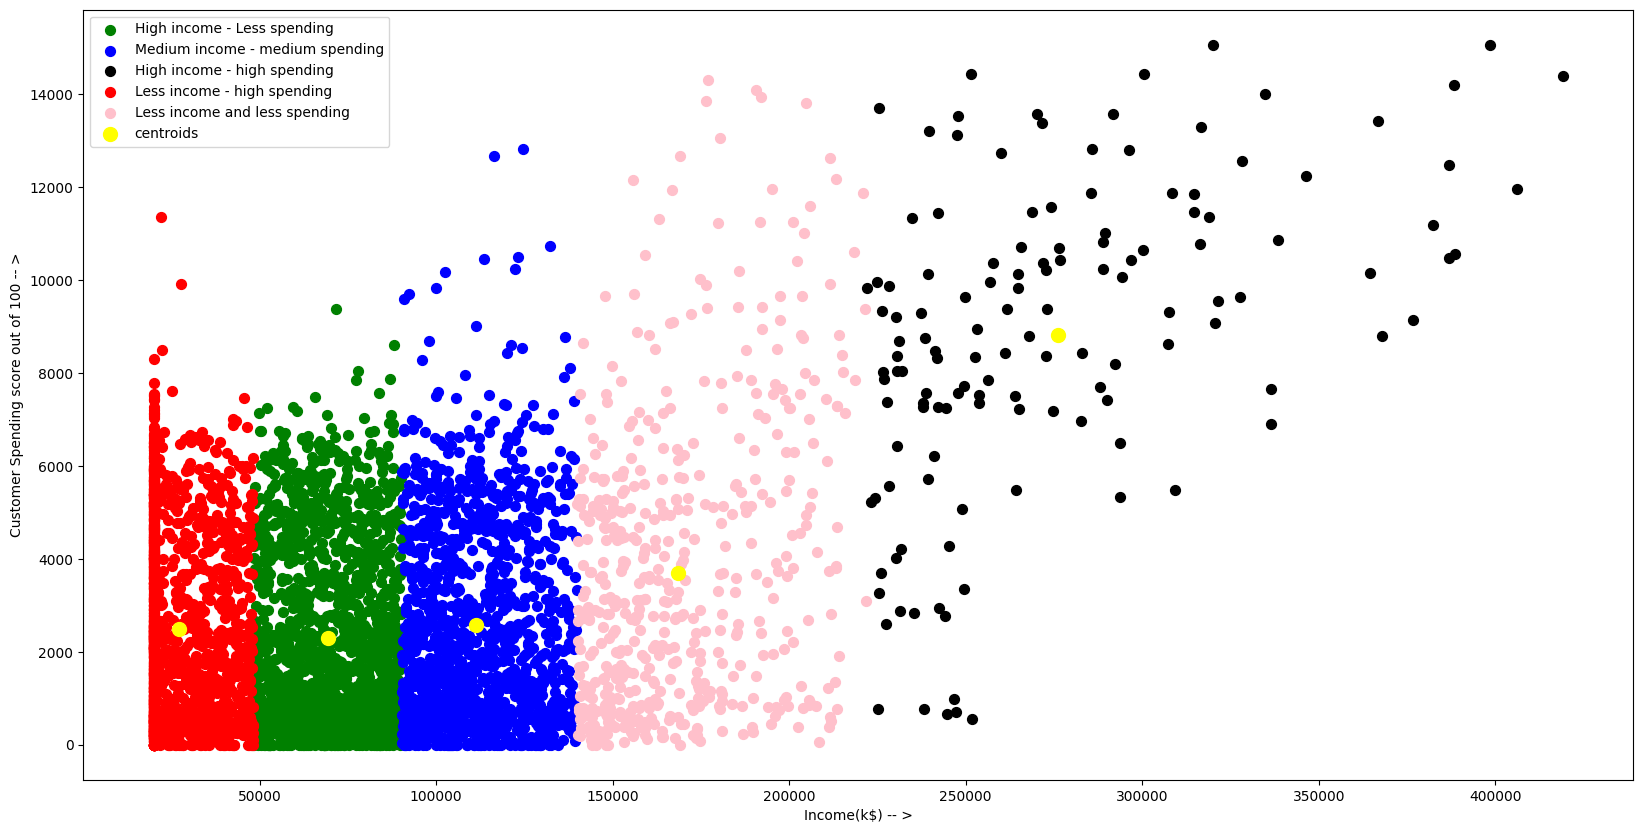

In [9]:
#Plot the clusters obtained using k means

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "High income - Less spending")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Medium income - medium spending")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "High income - high spending")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'red', label = "Less income - high spending")
plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Less income and less spending")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Income(k$) -- >")
plt.ylabel("Customer Spending score out of 100 -- >")
plt.legend()
plt.show()

In [10]:
# input matrix for segmentation
x = df[['Age','Income','CumulativePurchases']].values

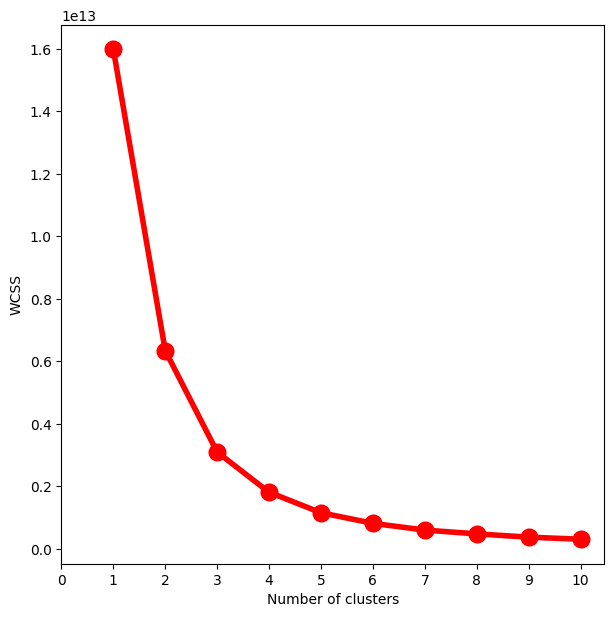

In [11]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age, income,Cumulativepurchases]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

<AxesSubplot:ylabel='count'>

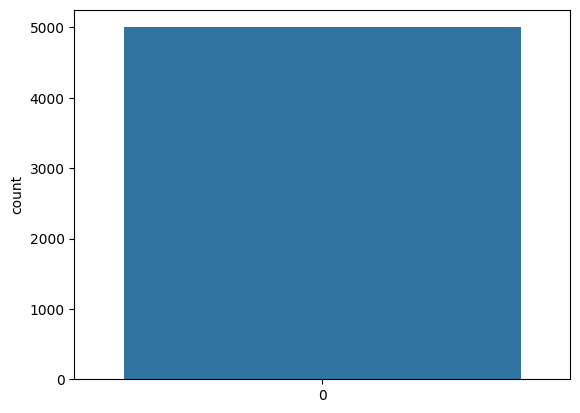

In [13]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [14]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

6.0
49263.05
1522.0


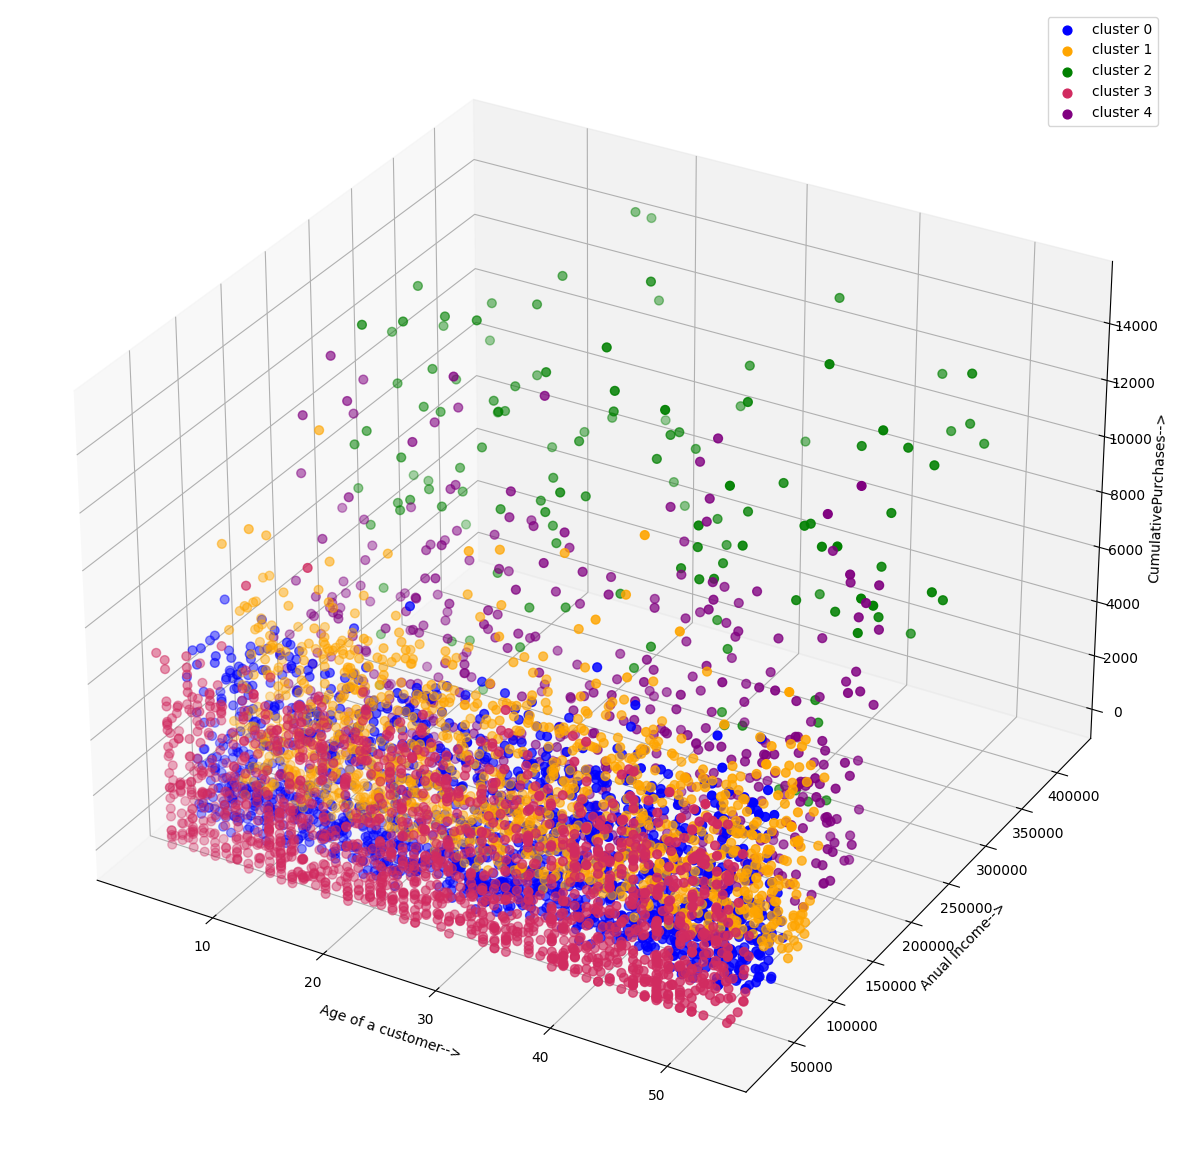

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('CumulativePurchases-->')
ax.legend()
plt.show()

In [16]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'CumulativePurchases--->'),zaxis = dict(title  = 'Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()